In [3]:
import pandas as pd

data = pd.read_csv('car_stopping_distance.csv')
data.head()

,Speed (mph),Distance (ft)
0,0.0,4.792753
1,1.0,4.250431
2,2.0,2.192925
3,2.0,19.488679
4,3.0,6.495950


In [4]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

x = data[['Speed (mph)']]
y = data['Distance (ft)']

lr.fit(x, y)

LinearRegression()

In [5]:
lr.intercept_

np.float64(-11.262025835961992)

In [6]:
lr.coef_

array([3.51244956])

In [7]:
lr.predict([[33.5]])

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([106.40503452])

In [8]:
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=50, shuffle=True, random_state=42)
cv_errors = cross_val_score(lr, x, y, cv=kf, scoring='neg_root_mean_squared_error')
cv_errors = cv_errors*-1
cv_errors

array([12.00832653,  5.92396283, 14.09657914,  1.50748125,  8.33788278,
       21.92504536, 17.35703035, 29.82215609, 25.64289081, 10.29382018,
        4.25391337,  7.69595196,  9.48818905,  4.79522139, 25.42470495,
        5.06672464, 19.4400842 ,  6.20065799, 10.93596638,  4.65573791,
       27.12761678,  1.53584038,  3.07069608,  0.32235463, 18.47621304,
       17.40928132, 37.16576134,  5.16780624, 35.37907864,  3.24888371,
       11.23848154,  2.9892115 , 14.49194248, 12.93337834, 24.60411171,
        6.89047876,  8.85477841, 11.785079  , 21.55847632, 14.65514764,
        8.35151858,  9.90075547, 17.84207427, 28.11489229,  4.09687844,
        8.2891891 , 17.71903385,  8.30566551, 10.47928452,  4.07734908])

In [9]:
cv_errors.mean()

np.float64(12.81907172281155)

In [10]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=3)
pf.fit_transform(x)[:10, :]

array([[  1.,   0.,   0.,   0.],
       [  1.,   1.,   1.,   1.],
       [  1.,   2.,   4.,   8.],
       [  1.,   2.,   4.,   8.],
       [  1.,   3.,   9.,  27.],
       [  1.,   4.,  16.,  64.],
       [  1.,   5.,  25., 125.],
       [  1.,   6.,  36., 216.],
       [  1.,   7.,  49., 343.],
       [  1.,   7.,  49., 343.]])

In [11]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
        ('pf', PolynomialFeatures(include_bias=False)),
        ('lr', LinearRegression())
])

In [12]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
        estimator = pipe,
        param_grid = {'pf__degree': [2, 3, 4]},
        cv = kf,
        scoring = 'neg_root_mean_squared_error',
)

grid_search.fit(x, y)

GridSearchCV(cv=KFold(n_splits=50, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('pf',
                                        PolynomialFeatures(include_bias=False)),
                                       ('lr', LinearRegression())]),
             param_grid={'pf__degree': [2, 3, 4]},
             scoring='neg_root_mean_squared_error')

In [13]:
grid_search.best_params_

{'pf__degree': 2}

In [14]:
grid_search.best_score_

np.float64(-9.7654628830857)

In [15]:
model = grid_search.best_estimator_
model.predict([[33.5]])

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([109.70508429])

In [16]:
model.named_steps['lr'].intercept_

np.float64(8.4253862240774)

In [17]:
model.named_steps['lr'].coef_

array([0.50214191, 0.07525769])

In [18]:
import numpy as np

xp = np.linspace(0, 60, 50)
xp

array([ 0.        ,  1.2244898 ,  2.44897959,  3.67346939,  4.89795918,
        6.12244898,  7.34693878,  8.57142857,  9.79591837, 11.02040816,
       12.24489796, 13.46938776, 14.69387755, 15.91836735, 17.14285714,
       18.36734694, 19.59183673, 20.81632653, 22.04081633, 23.26530612,
       24.48979592, 25.71428571, 26.93877551, 28.16326531, 29.3877551 ,
       30.6122449 , 31.83673469, 33.06122449, 34.28571429, 35.51020408,
       36.73469388, 37.95918367, 39.18367347, 40.40816327, 41.63265306,
       42.85714286, 44.08163265, 45.30612245, 46.53061224, 47.75510204,
       48.97959184, 50.20408163, 51.42857143, 52.65306122, 53.87755102,
       55.10204082, 56.32653061, 57.55102041, 58.7755102 , 60.        ])

In [19]:
xp = xp.reshape(50, 1)
xp[:10, :]

array([[ 0.        ],
       [ 1.2244898 ],
       [ 2.44897959],
       [ 3.67346939],
       [ 4.89795918],
       [ 6.12244898],
       [ 7.34693878],
       [ 8.57142857],
       [ 9.79591837],
       [11.02040816]])

In [20]:
yp = model.predict(xp)
yp

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([  8.42538622,   9.15309339,  10.10647959,  11.28554484,
        12.69028913,  14.32071245,  16.17681482,  18.25859623,
        20.56605668,  23.09919618,  25.85801471,  28.84251229,
        32.0526889 ,  35.48854456,  39.15007926,  43.037293  ,
        47.15018578,  51.4887576 ,  56.05300846,  60.84293837,
        65.85854731,  71.0998353 ,  76.56680233,  82.2594484 ,
        88.17777351,  94.32177766, 100.69146085, 107.28682308,
       114.10786436, 121.15458467, 128.42698403, 135.92506243,
       143.64881987, 151.59825635, 159.77337187, 168.17416643,
       176.80064003, 185.65279268, 194.73062437, 204.03413509,
       213.56332486, 223.31819367, 233.29874152, 243.50496841,
       253.93687435, 264.59445932, 275.47772333, 286.58666639,
       297.92128849, 309.48158963])

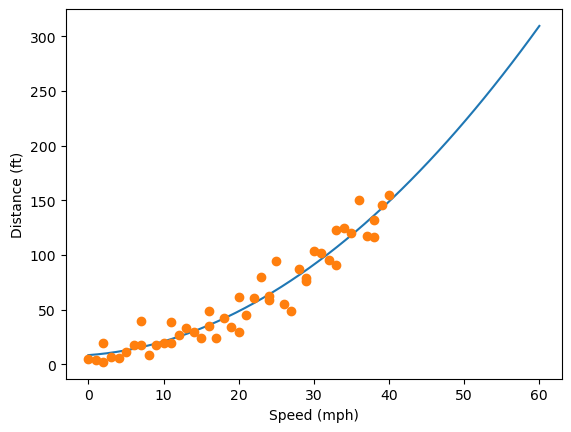

In [21]:
import matplotlib.pyplot as plt

plt.plot(xp, yp)
plt.plot(x, y, 'o')
plt.xlabel('Speed (mph)')
plt.ylabel('Distance (ft)')
plt.show()